<a href="https://colab.research.google.com/github/Arya0212/Breast-Cancer-Prediction/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib as plt

In [2]:
C = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(C.data, C.target, test_size=0.2, random_state=1)

In [4]:
import pandas as pd
cancer = pd.DataFrame(C.data, columns=C.feature_names)
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
cancer['Diagnosis'] = C.target

In [6]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
cancer['Diagnosis'].unique

<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: Diagnosis, Length: 569, dtype: int64>

In [8]:
cancer.shape

(569, 31)

Diagnosis
0    [[Axes(0.125,0.777333;0.103333x0.102667), Axes...
1    [[Axes(0.125,0.777333;0.103333x0.102667), Axes...
dtype: object

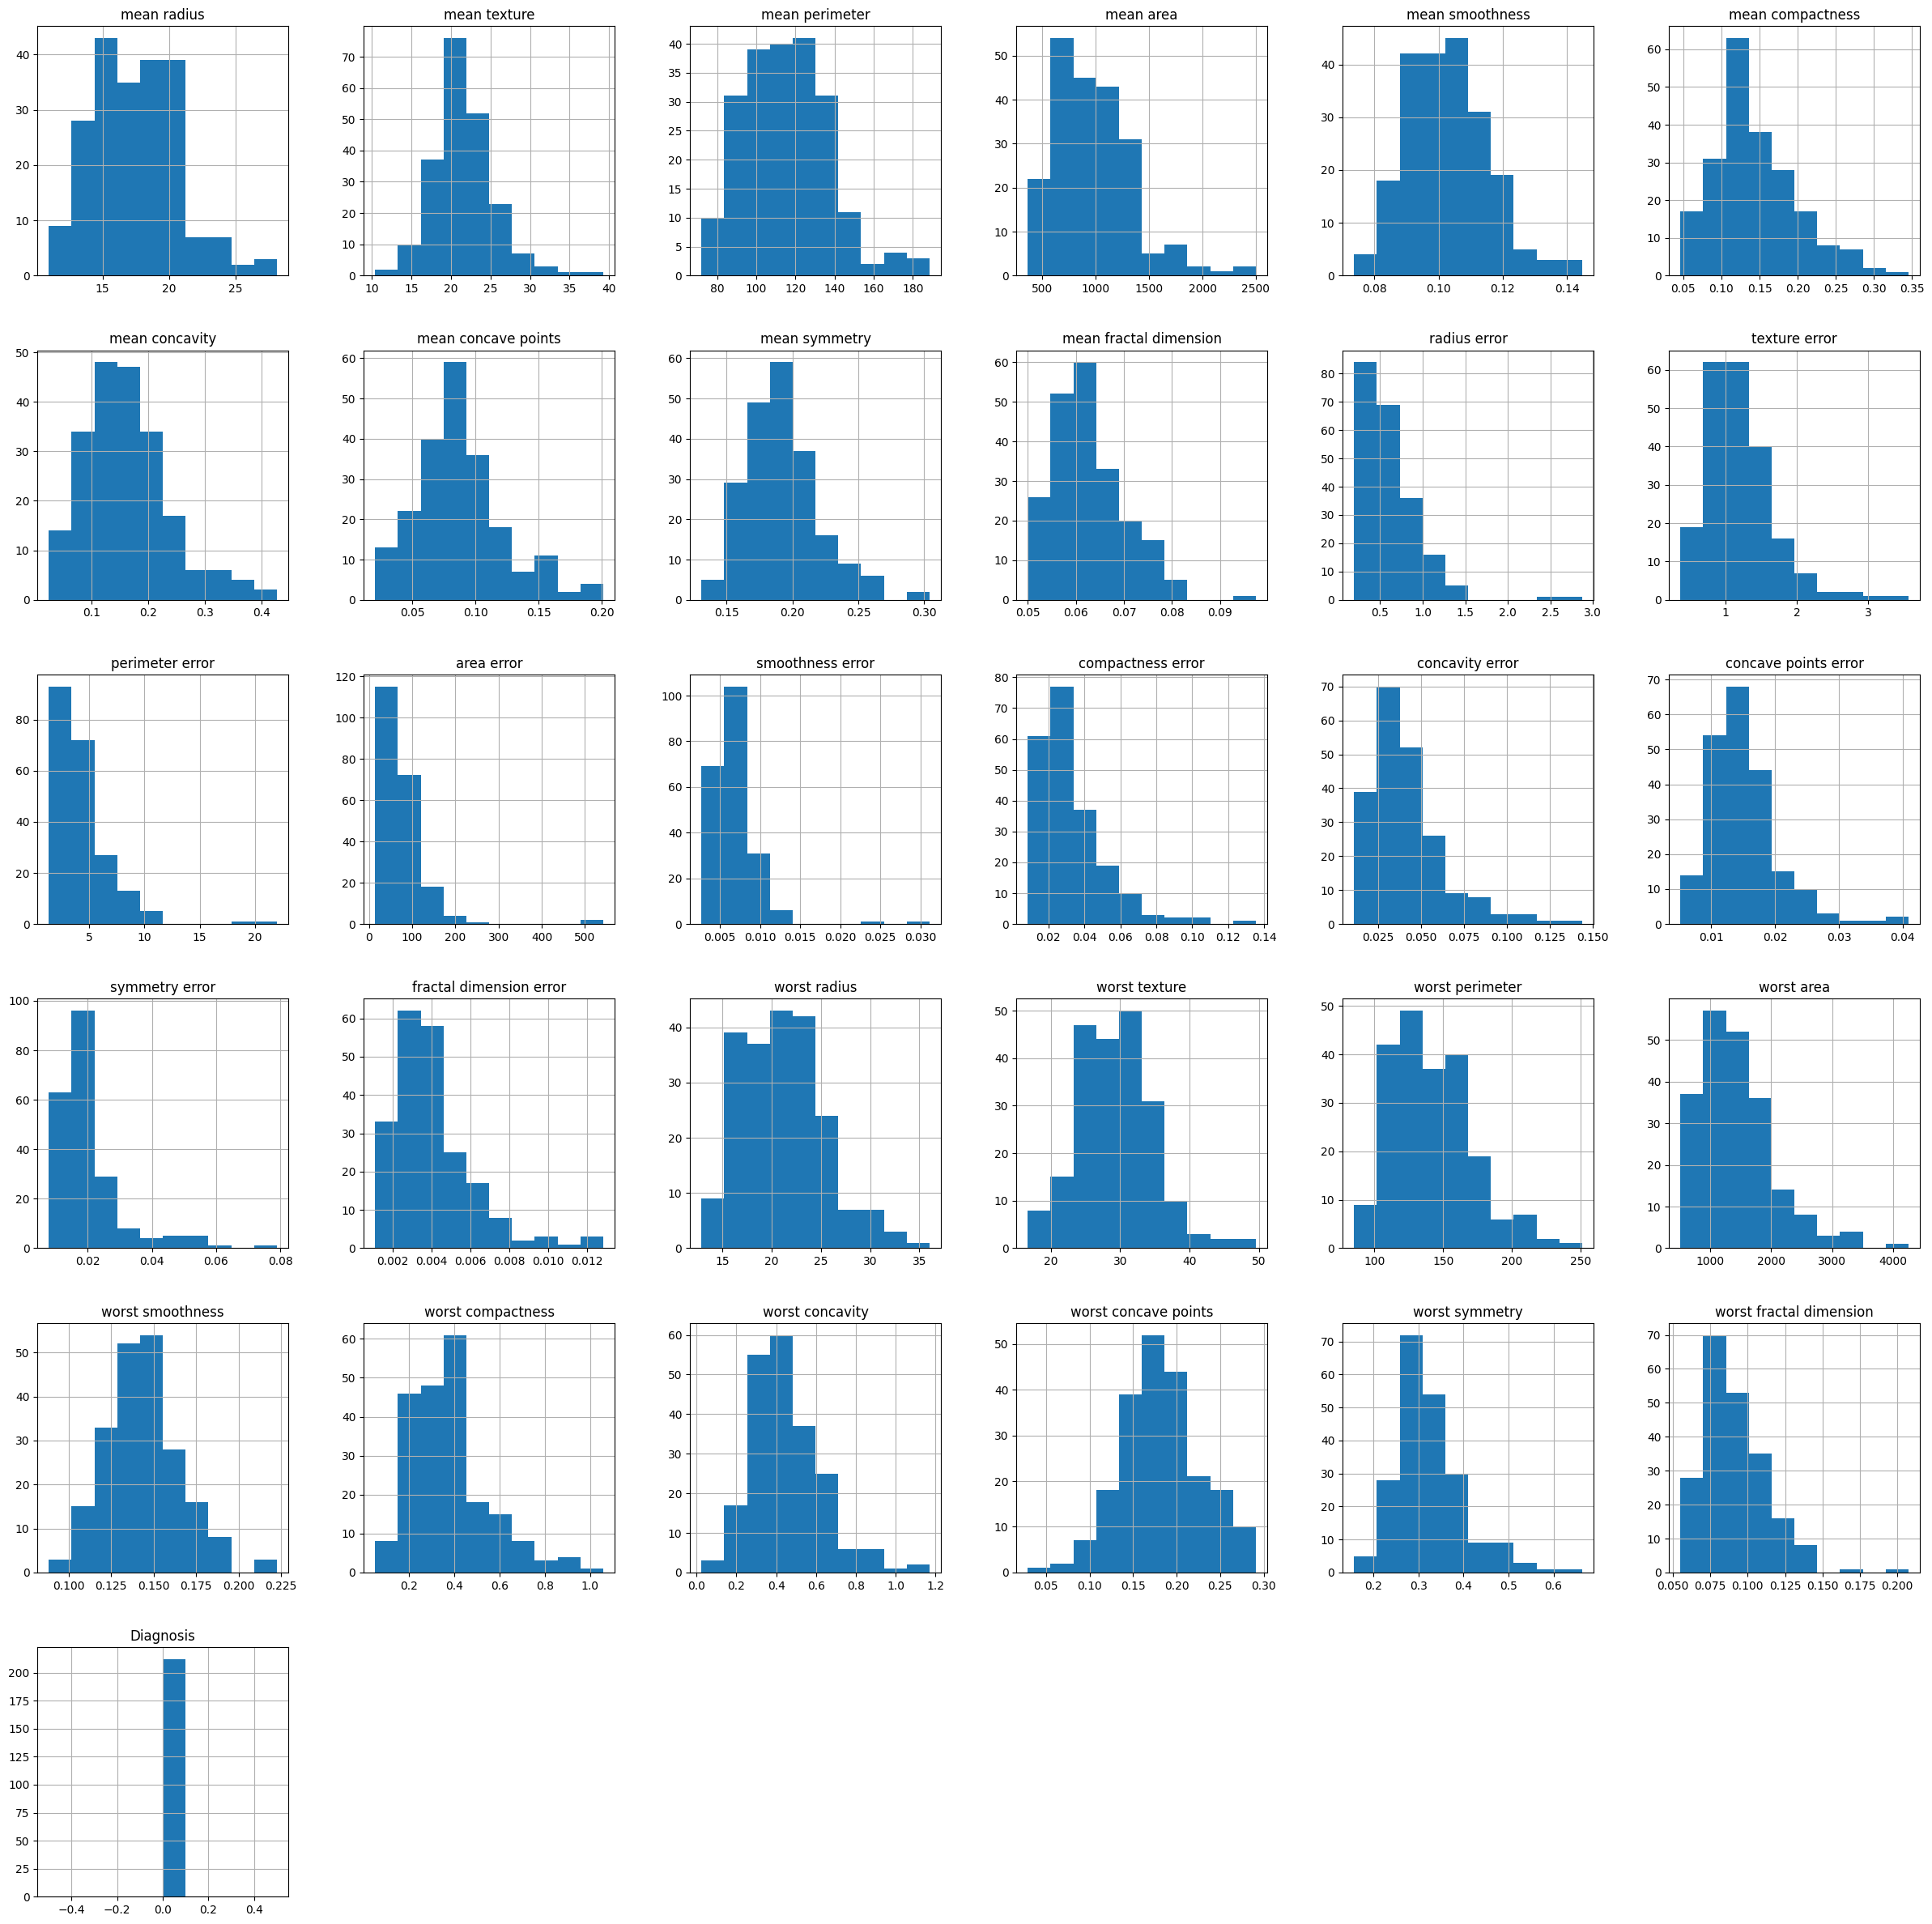

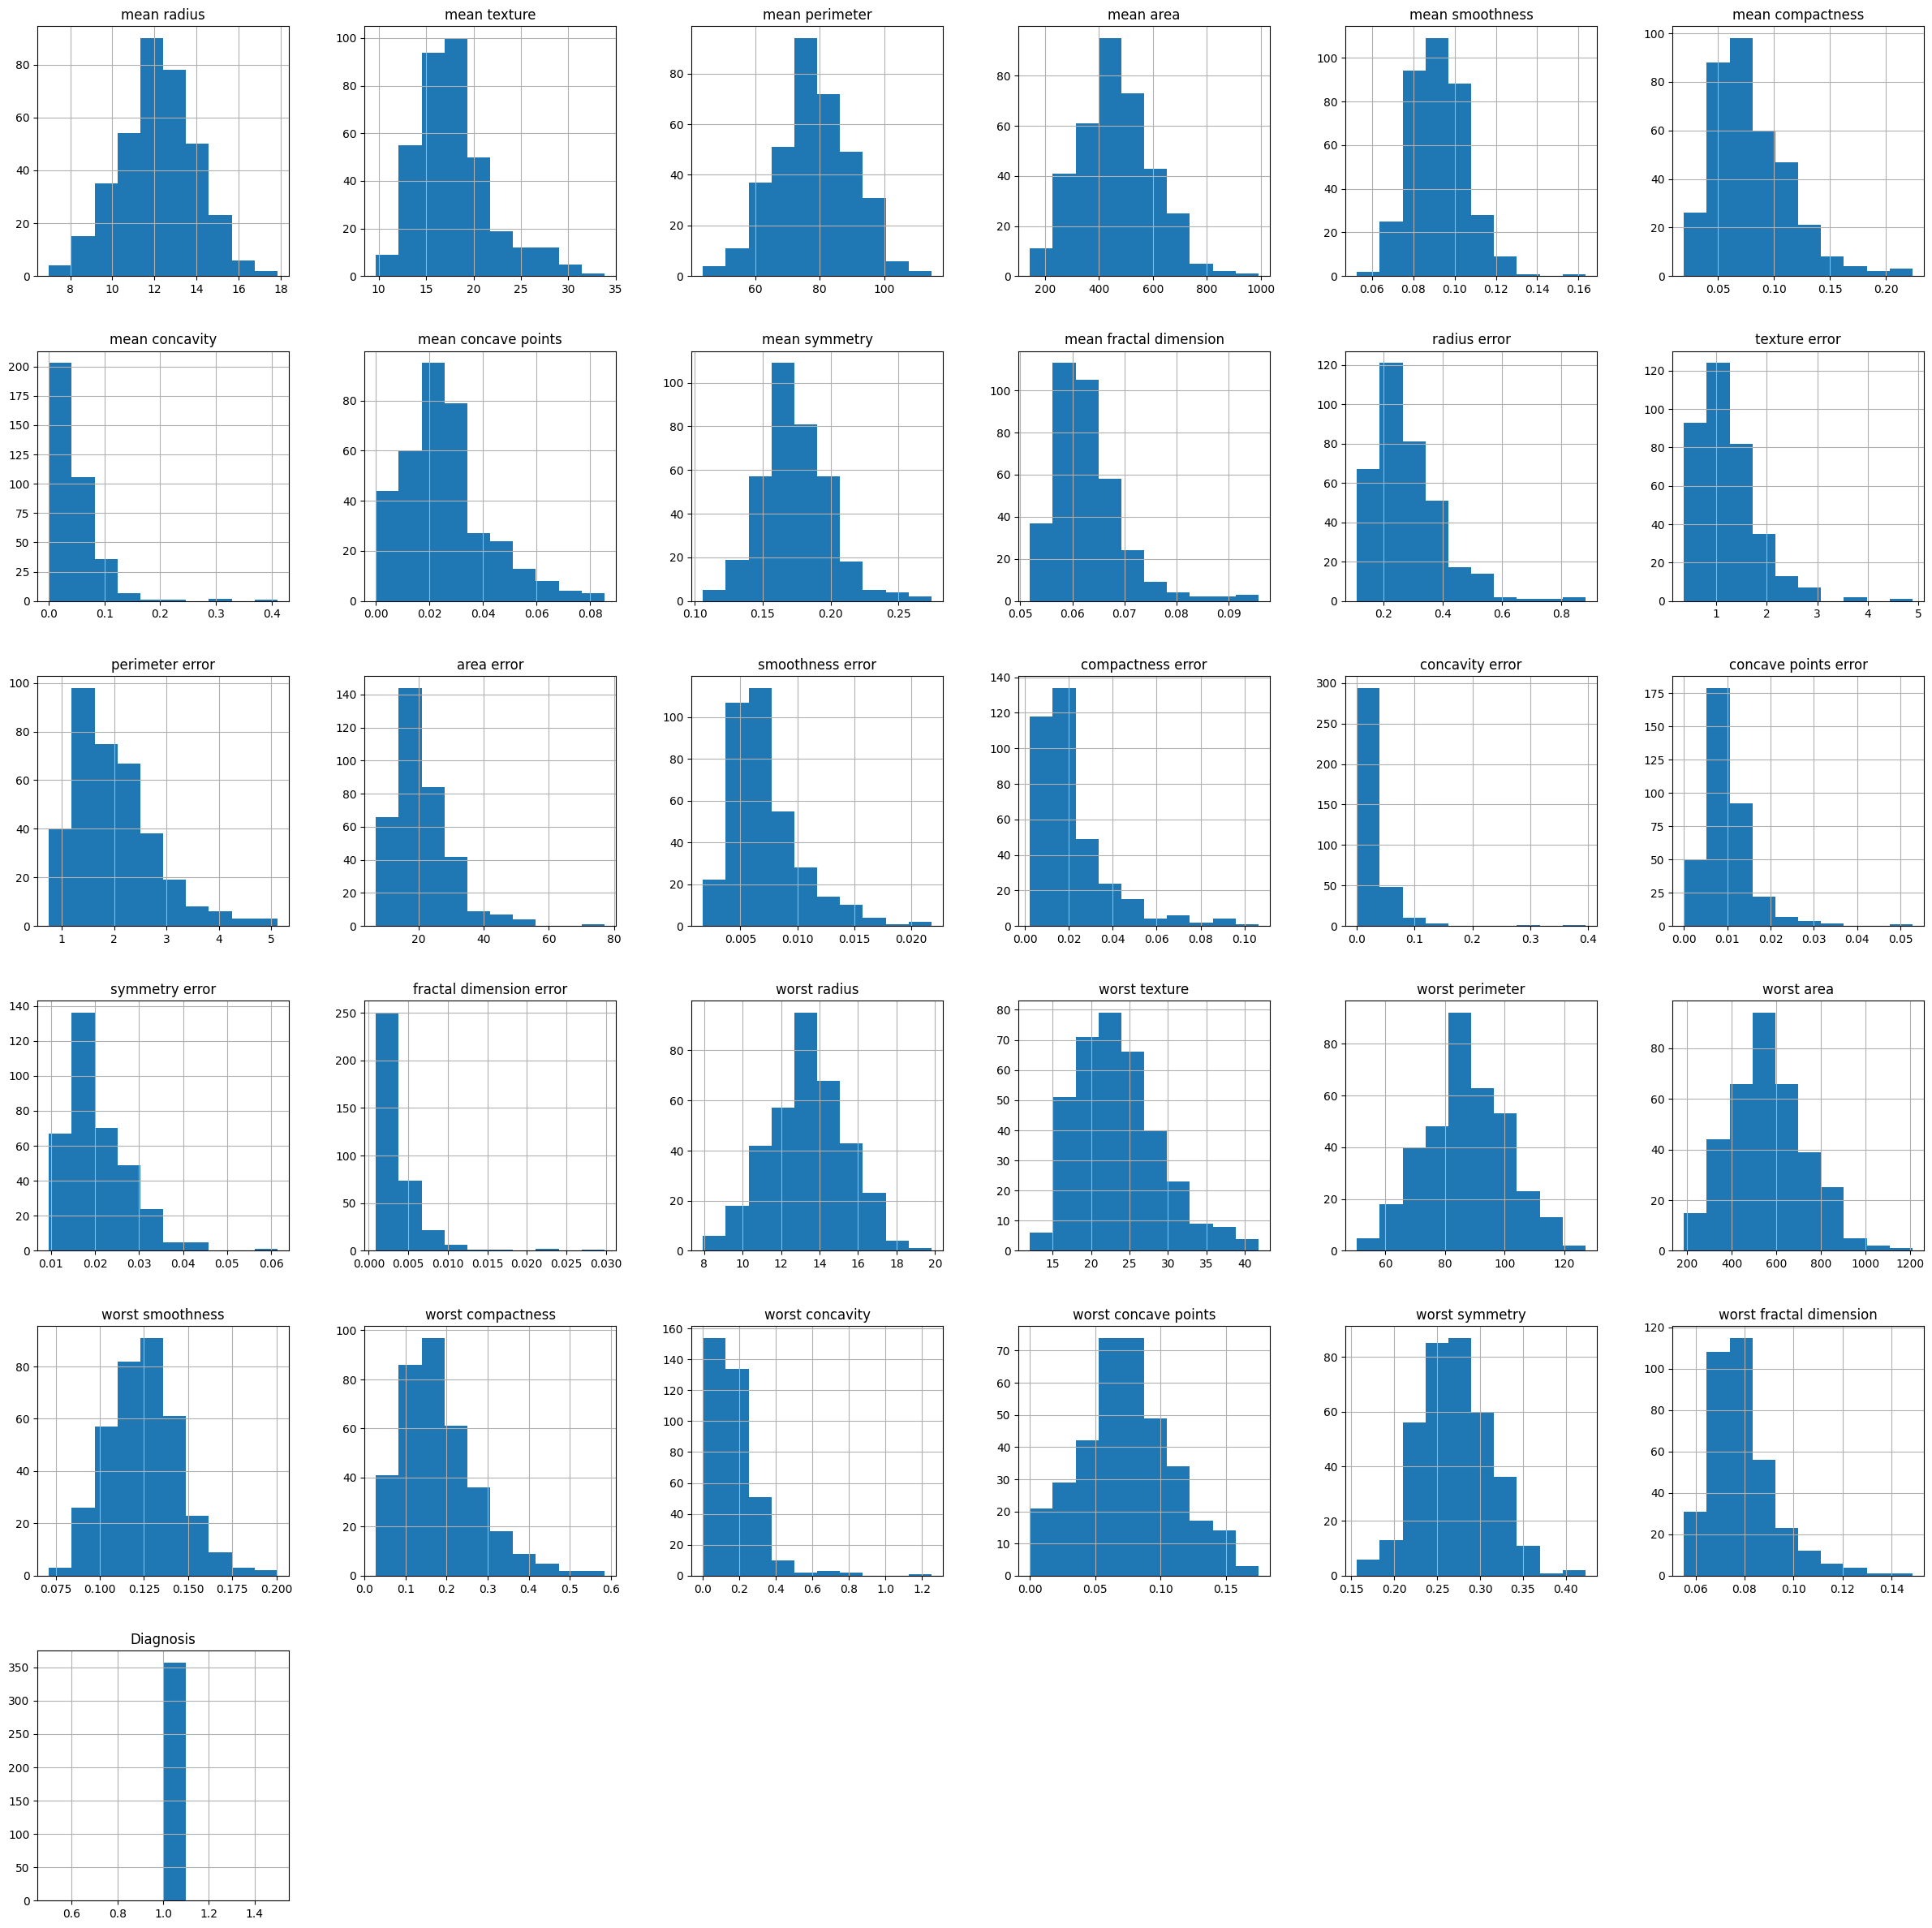

In [9]:
cancer.groupby('Diagnosis').hist(figsize=(30, 30))

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
C.target = labelencoder_Y.fit_transform(C.target)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [13]:
classifier = Sequential()

In [14]:
#Model Training
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [16]:
predictions = model.predict(X_test)

4/4 [==============================] - 1s 3ms/step


In [17]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model training
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
12/12 [==============================] - 2s 23ms/step - loss: 0.6273 - accuracy: 0.7005 - val_loss: 0.4502 - val_accuracy: 0.8901
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3775 - accuracy: 0.9066 - val_loss: 0.2784 - val_accuracy: 0.9670
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2488 - accuracy: 0.9341 - val_loss: 0.1936 - val_accuracy: 0.9780
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1814 - accuracy: 0.9451 - val_loss: 0.1507 - val_accuracy: 0.9890
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1406 - accuracy: 0.9588 - val_loss: 0.1279 - val_accuracy: 0.9890
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1149 - accuracy: 0.9725 - val_loss: 0.1160 - val_accuracy: 0.9890
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0964 - accuracy: 0.9753 - val_loss: 0.1094 - val_accuracy: 0.9890
Epoch 8/100


In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17002826929092407
Test accuracy: 0.9736841917037964
